            Name: Bilal H. Hungund K.
            Roll No: D013
            Course: MTech in Data Science (Business Analytics)
            Reference: bit.ly/hungundji

# Problem Statement

Given the data of about 54k Diamonds, predict the price of particular diamonds

# Data Dictionary

    carat - weight of the diamond
    price - Price of the diamond in US dollars
    cut  - quality of the cut (Fair, Good, Very Good, Premium, Ideal)
    color - diamond color, from J (worst) to D (best)
    clarity - a measurement on how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
    x - length in mm 
    y - width in mm 
    z - depth in mm 
    depth -  total depth percentage = z / mean(x, y) 
    table - width of top of diamond relative to widest point

# Hypothesis Generation

The factors which affects the price of diamonds are,
    1. Length, Width, and Depth of the diamond will increase the price.
    2. A unit of carat will also affect the price of diamond.
    3. Popular color of diamond will increase the price.
    4. Clarity of diamond will affect the price.
    5. High Level of cut will increase the demand of diamond.

# Getting System ready, Importing Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from datetime import datetime

from scipy import stats
from statsmodels.stats import weightstats as stests

In [2]:
from sklearn.pipeline import Pipeline

import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


from sklearn.feature_extraction import FeatureHasher

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import copy

# Loading the data

In [3]:
train = pd.read_csv('data.csv')

    Copy the data for future refrence

In [4]:
train_copy = train.copy()

# Understanding the data

In [5]:
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Dropping the ID column

In [6]:
train = train.drop(['Unnamed: 0'], axis = 1)
train_copy = train_copy.drop(['Unnamed: 0'], axis = 1)

In [7]:
train.shape

(53940, 10)

In [8]:
train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [10]:
train.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Correlation between the data

In [12]:
train.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


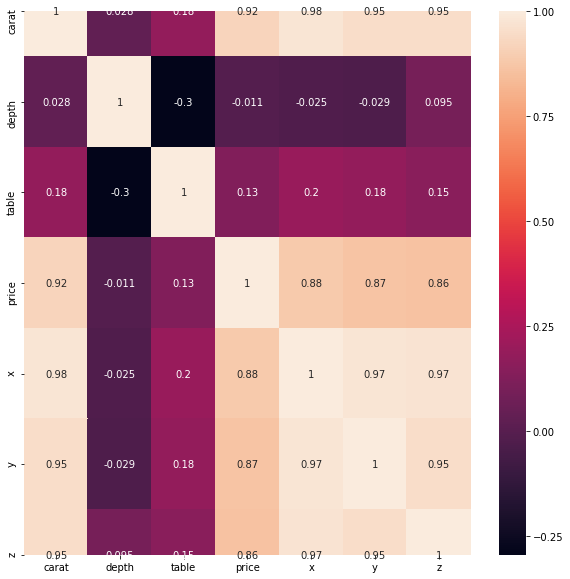

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True)

# price (Dependent Variable)

In [14]:
train['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

# carat analysis

In [15]:
train['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

Histogram and Box plot for Carat Variable, which depicts the Right Skewed Distribution

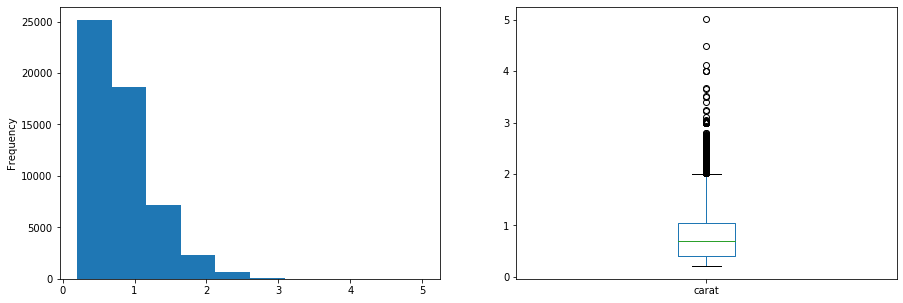

In [16]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
train['carat'].plot.hist(ax=axarr[0])
train['carat'].plot.box(ax=axarr[1])

    Outlier Detection using IQR Method

In [17]:
Q1_carat = train['carat'].quantile(0.25)
Q3_carat = train['carat'].quantile(0.75)
IQR_carat = Q3_carat  - Q1_carat 
upper_carat = Q3_carat + 1.5 * IQR_carat
lower_carat = Q1_carat - 1.5 * IQR_carat
upper_carat, lower_carat

(2.0, -0.5599999999999999)

    As, it is right skewed, upper quantile will contains majority of data, as outliers

In [18]:
print("Values below lower quantile: ",train[train['carat'] < lower_carat]['carat'].count())
print("Values above upper quantile: ",train[train['carat'] > upper_carat]['carat'].count())

Values below lower quantile:  0
Values above upper quantile:  1889


    Hypothesis number 2. As carat unit increases price of diamond also increases

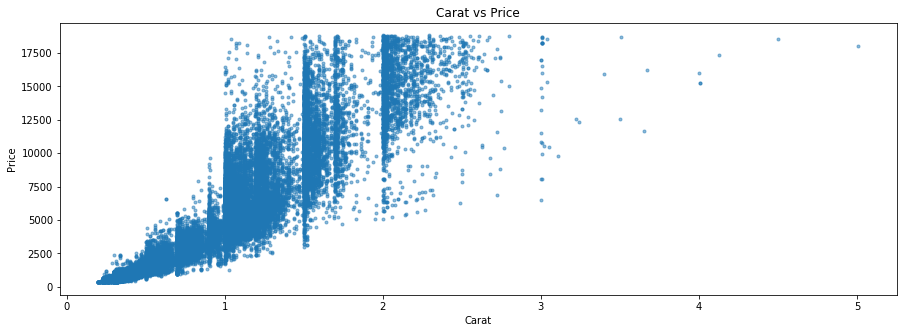

In [19]:
fig, axarr = plt.subplots(1,1, figsize=(15, 5))
plt.scatter(train['carat'], train['price'], marker='.', alpha=0.5)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

# cut analysis

In [20]:
train['cut'].describe()

count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object

In [21]:
train['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

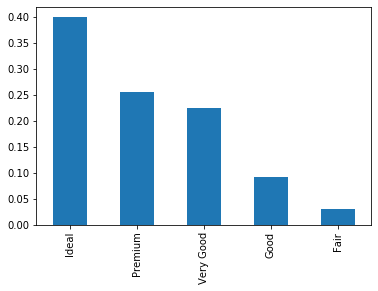

In [22]:
train['cut'].value_counts(normalize=True).plot.bar()

,price
cut,
Fair,4358.757764
Good,3928.864452
Ideal,3457.541970
Premium,4584.257704
Very Good,3981.759891


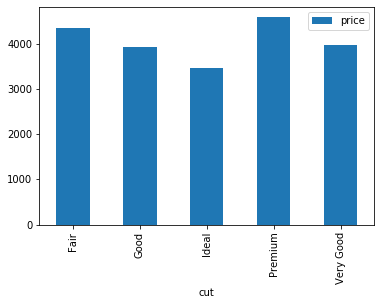

In [23]:
train[["price","cut"]].groupby(["cut"]).mean().plot.bar()

train[["price","cut"]].groupby(["cut"]).mean()

   From the above graph, it is observed that <b> Premium </b> quality cut is having the highest price, followed by <b> Fair </b> cut, <b> Very Good </b> Cut, <b> Good </b> cut and <b> Ideal </b> Cut

    Hypothesis No. 5: Thus Premium quality of cut will increase the price of Diamond.

Text(0.5, 0.98, '')

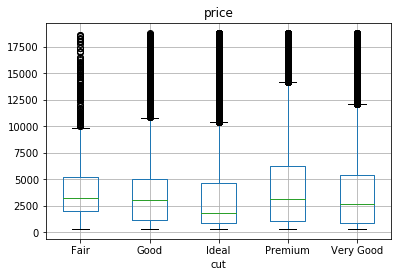

In [24]:
train.boxplot(column='price', by = 'cut')
plt.suptitle("")

<b>One Way F-test (Anova)</b> determines whether 2 or more group of categorical variable are similar or not based on their mean similarity and f-score

In [25]:
train = train[['price','cut']]
grps = pd.unique(train.cut.values)

data = {grp: train['price'][train.cut == grp] for grp in grps}

F, p = stats.f_oneway(data['Fair'], data['Good'], data['Ideal'], data['Premium'], data['Very Good'])

print("p-value = ", p)
print("f-value = ", F)

if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

p-value =  8.42830730759452e-150
f-value =  175.68871735080606
Reject Null Hypothesis


    Above test determines, Fair, Good, Ideal, Premium and Very Good cut are not similar in nature w.r.t price

# color analysis

In [26]:
train = train_copy
train['color'].describe()

count     53940
unique        7
top           G
freq      11292
Name: color, dtype: object

In [27]:
train['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

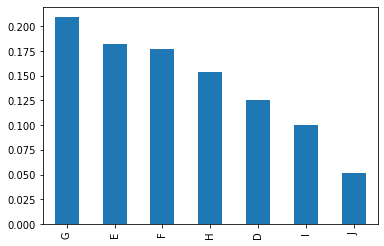

In [28]:
train['color'].value_counts(normalize=True).plot.bar()

,price
color,
D,3169.954096
E,3076.752475
F,3724.886397
G,3999.135671
H,4486.669196
I,5091.874954
J,5323.818020


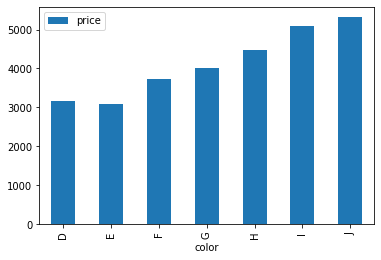

In [29]:
train[["price","color"]].groupby(["color"]).mean().plot.bar()

train[["price","color"]].groupby(["color"]).mean()

   Above graph depicts, best color of diamond is normally priced less rather than worst color J is having high price.

    Hence, Hypothesis no. 3, it is not necessary that popular color will create an impact on price of diamond

Text(0.5, 0.98, '')

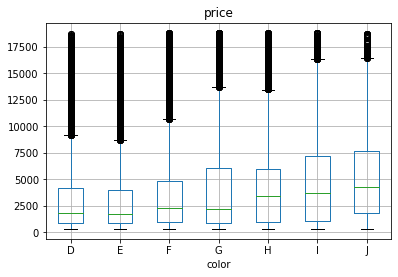

In [30]:
train.boxplot(column='price', by = 'color')
plt.suptitle("")

In [31]:
train = train[['price','color']]
grps = pd.unique(train.color.values)

data = {grp: train['price'][train.color == grp] for grp in grps}

F, p = stats.f_oneway(data['D'], data['E'], data['F'], data['G'], data['H'], data['I'], data['J'])

print("p-value = ", p)
print("f-value = ", F)

if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

p-value =  0.0
f-value =  290.20588071108835
Reject Null Hypothesis


    Above test determines, Color D, E, F, G, H, I, and J are not similar to each other w.r.t. to price

# clarity analysis

In [32]:
train = train_copy
train['clarity'].describe()

count     53940
unique        8
top         SI1
freq      13065
Name: clarity, dtype: object

In [33]:
train['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

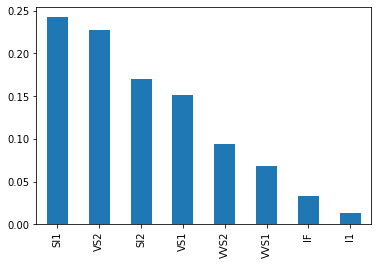

In [34]:
train['clarity'].value_counts(normalize=True).plot.bar()

,price
clarity,
I1,3924.168691
IF,2864.839106
SI1,3996.001148
SI2,5063.028606
VS1,3839.455391
VS2,3924.989395
VVS1,2523.114637
VVS2,3283.737071


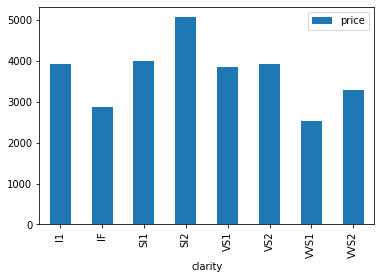

In [35]:
train[["price","clarity"]].groupby(["clarity"]).mean().plot.bar()

train[["price","clarity"]].groupby(["clarity"]).mean()

Above graphs, showcase that, SI1 type of clarity is having more price than any other type.

    Thus, Hypothesis 4, will reject as it is not necessary for diamond to have a best clarity.

Text(0.5, 0.98, '')

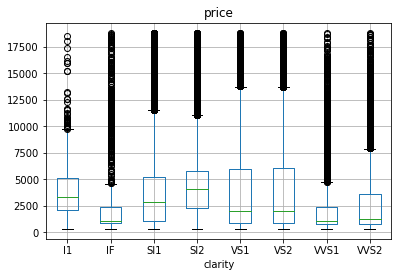

In [36]:
train.boxplot(column='price', by = 'clarity')
plt.suptitle("")

In [37]:
train = train[['price','clarity']]
grps = pd.unique(train.clarity.values)

data = {grp: train['price'][train.clarity == grp] for grp in grps}

F, p = stats.f_oneway(data['I1'], data['IF'], data['SI1'], data['SI2'], data['VS1'], data['VS2'], data['VVS1'], data['VVS2'])

print("p-value = ", p)
print("f-value = ", F)

if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

p-value =  1.9190895e-316
f-value =  215.01926041020076
Reject Null Hypothesis


    Above test determines, no relation between the clarity indexes.

In [38]:
train = train[['price','clarity']]
grps = pd.unique(train.clarity.values)

data = {grp: train['price'][train.clarity == grp] for grp in grps}

F, p = stats.f_oneway(data['SI1'], data['VS2'])

print("p-value = ", p)
print("f-value = ", F)

if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

p-value =  0.14958892495059117
f-value =  2.0765638718503765
Accept Null Hypothesis


    But here above test determines, some similarity between SI1 and VS2 measurements.

# depth analysis

In [39]:
train = train_copy
train['depth'].describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

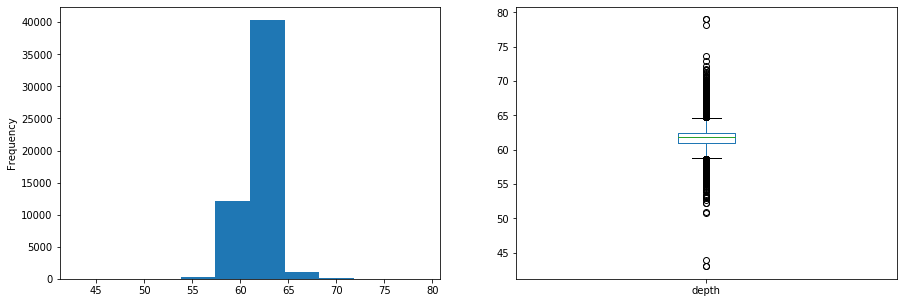

In [40]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
train['depth'].plot.hist(ax=axarr[0])
train['depth'].plot.box(ax=axarr[1])

From the above analysis, it determines that, majority or population lies on the center.

    Outlier Detection using IQR Method

In [41]:
Q1_depth = train['depth'].quantile(0.25)
Q3_depth = train['depth'].quantile(0.75)
IQR_depth = Q3_depth  - Q1_depth 
upper_depth = Q3_depth + 1.5 * IQR_depth
lower_depth = Q1_depth - 1.5 * IQR_depth
upper_depth, lower_depth

(64.75, 58.75)

In [42]:
print("Values below lower quantile: ",train[train['depth'] < lower_depth]['depth'].count())
print("Values above upper quantile: ",train[train['depth'] > upper_depth]['depth'].count())

Values below lower quantile:  1506
Values above upper quantile:  1039


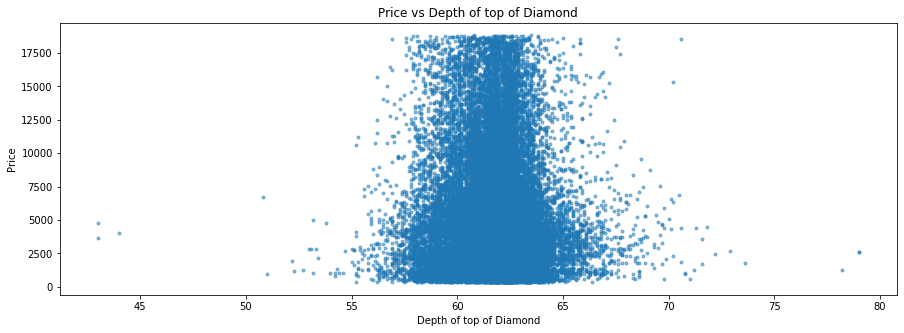

In [43]:
fig, axarr = plt.subplots(1,1, figsize=(15, 5))
plt.scatter(train['depth'], train['price'], marker='.', alpha=0.5)
plt.title('Price vs Depth of top of Diamond')
plt.xlabel('Depth of top of Diamond')
plt.ylabel('Price')
plt.show()

    Above image depicts that, depth of top of diamond should lie between 55-70 unit to impact on rise of price of diamond.

# table analysis

In [44]:
train = train_copy
train['table'].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

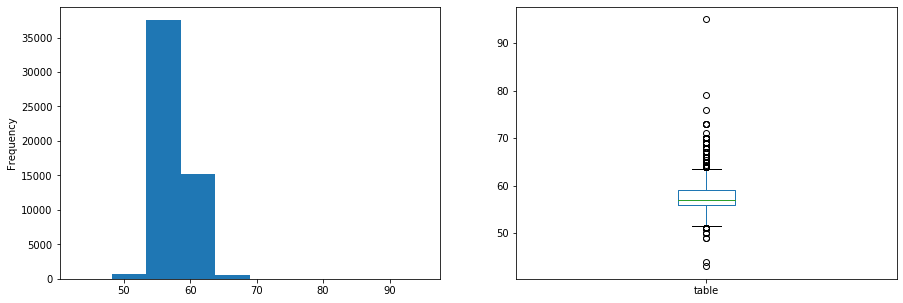

In [45]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
train['table'].plot.hist(ax=axarr[0])
train['table'].plot.box(ax=axarr[1])

In [46]:
Q1_table = train['table'].quantile(0.25)
Q3_table = train['table'].quantile(0.75)
IQR_table = Q3_table  - Q1_table 
upper_table = Q3_table + 1.5 * IQR_table
lower_table = Q1_table - 1.5 * IQR_table
upper_table, lower_table

(63.5, 51.5)

In [47]:
print("Values below lower quantile: ",train[train['table'] < lower_table]['table'].count())
print("Values above upper quantile: ",train[train['table'] > upper_table]['table'].count())

Values below lower quantile:  16
Values above upper quantile:  589


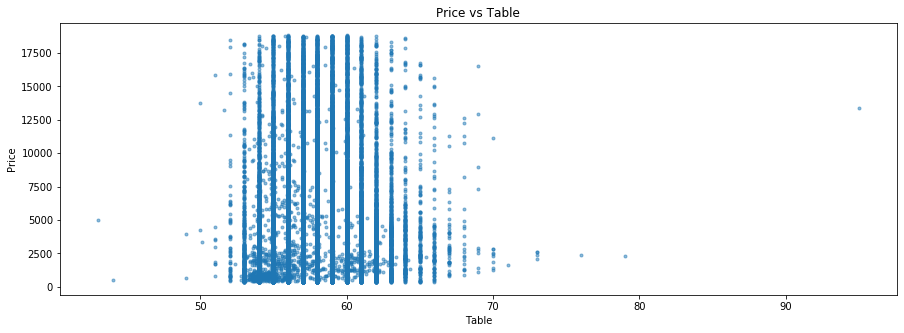

In [48]:
fig, axarr = plt.subplots(1,1, figsize=(15, 5))
plt.scatter(train['table'], train['price'], marker='.', alpha=0.5)
plt.title('Price vs Table')
plt.xlabel('Table')
plt.ylabel('Price')
plt.show()

# length (x) analysis

In [49]:
train = train_copy
train['x'].describe()

count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

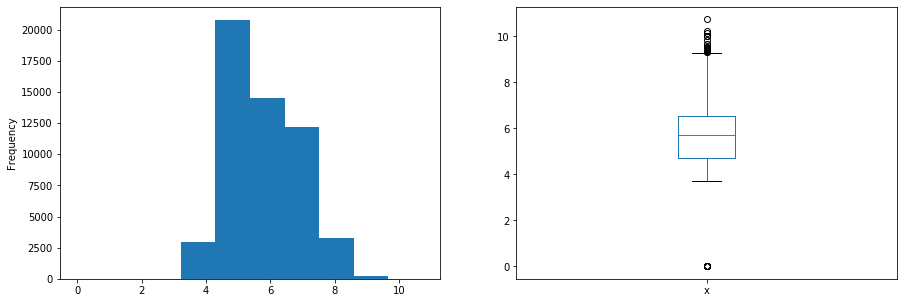

In [50]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
train['x'].plot.hist(ax=axarr[0])
train['x'].plot.box(ax=axarr[1])

In [51]:
Q1_x = train['x'].quantile(0.25)
Q3_x = train['x'].quantile(0.75)
IQR_x = Q3_x  - Q1_x 
upper_x = Q3_x + 1.5 * IQR_x
lower_x = Q1_x - 1.5 * IQR_x
upper_x, lower_x

(9.285, 1.9649999999999999)

In [52]:
print("Values below lower quantile: ",train[train['x'] < lower_x]['x'].count())
print("Values above upper quantile: ",train[train['x'] > upper_x]['x'].count())

Values below lower quantile:  8
Values above upper quantile:  24


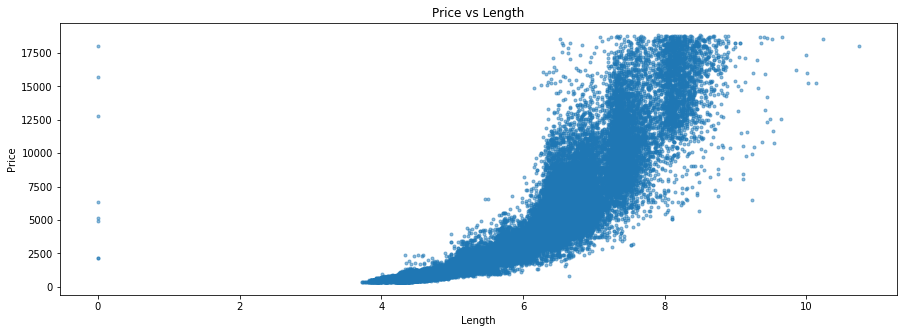

In [53]:
fig, axarr = plt.subplots(1,1, figsize=(15, 5))
plt.scatter(train['x'], train['price'], marker='.', alpha=0.5)
plt.title('Price vs Length')
plt.xlabel('Length')
plt.ylabel('Price')
plt.show()

    Above image depicts that, as the length of diamond increases price will increase.

# width (y) analysis

In [54]:
train = train_copy
train['y'].describe()

count    53940.000000
mean         5.734526
std          1.142135
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

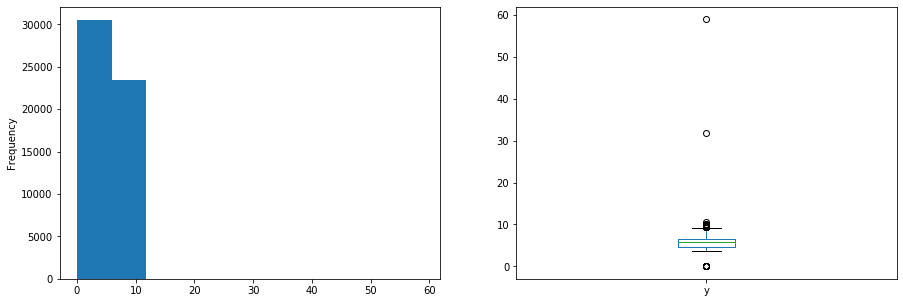

In [55]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
train['y'].plot.hist(ax=axarr[0])
train['y'].plot.box(ax=axarr[1])

In [56]:
Q1_y = train['y'].quantile(0.25)
Q3_y = train['y'].quantile(0.75)
IQR_y = Q3_y  - Q1_y 
upper_y = Q3_y + 1.5 * IQR_y
lower_y = Q1_y - 1.5 * IQR_y
upper_y, lower_y

(9.27, 1.9899999999999993)

In [57]:
print("Values below lower quantile: ",train[train['y'] < lower_y]['y'].count())
print("Values above upper quantile: ",train[train['y'] > upper_y]['y'].count())

Values below lower quantile:  7
Values above upper quantile:  22


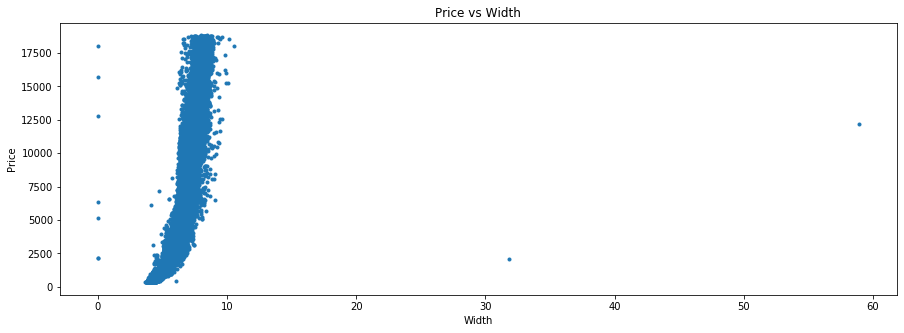

In [58]:
fig, axarr = plt.subplots(1,1, figsize=(15, 5))
plt.scatter(train['y'], train['price'], marker='.')
plt.title('Price vs Width')
plt.xlabel('Width')
plt.ylabel('Price')
plt.show()

    It depicts that, increase in width of diamond does not impact on price

# depth (z) analysis

In [59]:
train = train_copy
train['z'].describe()

count    53940.000000
mean         3.538734
std          0.705699
min          0.000000
25%          2.910000
50%          3.530000
75%          4.040000
max         31.800000
Name: z, dtype: float64

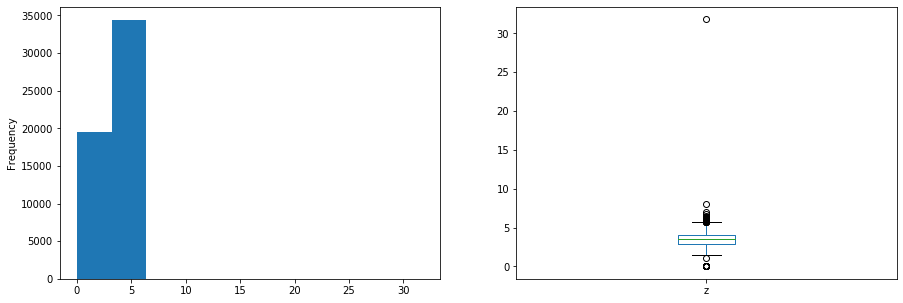

In [60]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
train['z'].plot.hist(ax=axarr[0])
train['z'].plot.box(ax=axarr[1])

In [61]:
Q1_z = train['z'].quantile(0.25)
Q3_z = train['z'].quantile(0.75)
IQR_z = Q3_z  - Q1_z 
upper_z = Q3_z + 1.5 * IQR_z
lower_z = Q1_z - 1.5 * IQR_z
upper_z, lower_z

(5.734999999999999, 1.2150000000000003)

In [62]:
print("Values below lower quantile: ",train[train['z'] < lower_z]['z'].count())
print("Values above upper quantile: ",train[train['z'] > upper_z]['z'].count())

Values below lower quantile:  21
Values above upper quantile:  28


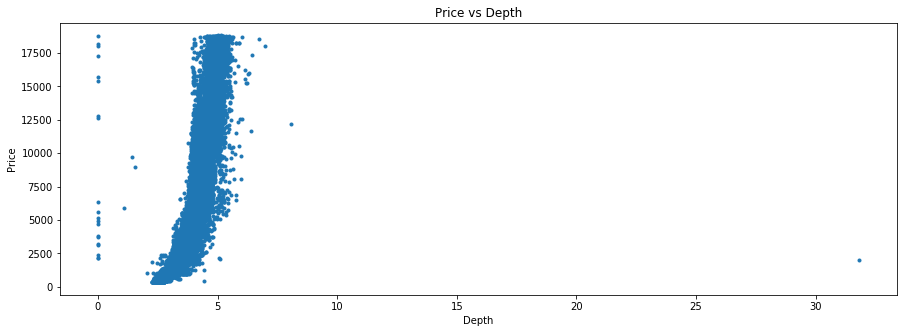

In [63]:
fig, axarr = plt.subplots(1,1, figsize=(15, 5))
plt.scatter(train['z'], train['price'], marker='.')
plt.title('Price vs Depth')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()

    Same here too, depth of diamond will not create an impact on price.

# Standardization of Continuous Variable

    Standardization of continuous variable is required to scaled the data on 0-1, and handling with outliers present in the data.

In [64]:
cols = train.select_dtypes('float64').columns
scaler = preprocessing.StandardScaler().fit(train[cols])
train[cols] = scaler.transform(train[cols])
print("Mean of standardized value: ",scaler.mean_)

Mean of standardized value:  [ 0.79793975 61.74940489 57.45718391  5.73115721  5.73452595  3.53873378]


# Feature Extraction of Categorical Variable

    For categorical variable, One Hot Encoding would be best to analyze in more detail by extracting more features.

In [65]:
train = pd.get_dummies(train)
train.shape

(53940, 27)

# Model Building (Train-Validation Data) 

In [66]:
xtrain = train.drop('price', axis = 1)
ytrain = train['price']

    Segregating training and validation data

In [67]:
x_train, x_valid, y_train, y_valid = train_test_split (xtrain, ytrain, test_size = 0.20, random_state=42)

# Cross Validation

    Cross validation is required to leave a sample on which model is not trained and test the model before finalizing.

In [68]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRFR', Pipeline([('Scaler', StandardScaler()),('RFR', RandomForestRegressor())])))
pipelines.append(('ScaledLGB', Pipeline([('Scaler', StandardScaler()),('LGB', LGBMRegressor())])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBRegressor(objective='reg:squarederror'))])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))


results = []
names = []
for name, model in pipelines:
    # Number of folds = 10
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.919774 (0.003801)
ScaledKNN: 0.951648 (0.002472)
ScaledCART: 0.964913 (0.002201)
ScaledGBM: 0.965623 (0.001271)
ScaledRFR: 0.978825 (0.001911)
ScaledLGB: 0.981227 (0.001635)
ScaledXGB: 0.965615 (0.001510)
ScaledLASSO: 0.919791 (0.003724)
ScaledEN: 0.841658 (0.009049)


    Here it inferred that LGBMRegressor will give the best results, as, it calculates highest average error.

# Model Building

Creating a LGBMRegressor Model and fitting it with train data

In [69]:
regressor = LGBMRegressor(n_estimators=2000, learning_rate = 0.2)
regressor.fit(x_train,y_train, eval_set=[(x_train,y_train),(x_valid, y_valid.values)], early_stopping_rounds=2000, verbose=100)

Training until validation scores don't improve for 2000 rounds.
[100]	training's l2: 198290	valid_1's l2: 296422
[200]	training's l2: 158687	valid_1's l2: 298343
[300]	training's l2: 133252	valid_1's l2: 303591
[400]	training's l2: 114317	valid_1's l2: 307682
[500]	training's l2: 100446	valid_1's l2: 311537
[600]	training's l2: 90554.4	valid_1's l2: 316197
[700]	training's l2: 81573.2	valid_1's l2: 317758
[800]	training's l2: 74990.3	valid_1's l2: 318898
[900]	training's l2: 68917.9	valid_1's l2: 321165
[1000]	training's l2: 63005.8	valid_1's l2: 322593
[1100]	training's l2: 57598.7	valid_1's l2: 323400
[1200]	training's l2: 53937.5	valid_1's l2: 324536
[1300]	training's l2: 50234	valid_1's l2: 325960
[1400]	training's l2: 46709.2	valid_1's l2: 327467
[1500]	training's l2: 43568.1	valid_1's l2: 328436
[1600]	training's l2: 40650.2	valid_1's l2: 329186
[1700]	training's l2: 37840.2	valid_1's l2: 330297
[1800]	training's l2: 35436.3	valid_1's l2: 331366
[1900]	training's l2: 33286.4	vali

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.2, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=2000, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Predicting the validation part, with validation independent variables

In [70]:
predicted = regressor.predict(x_valid)

# Model Evaluation Metrics

In [71]:
n = x_train.shape[0]
p = x_train.shape[1] - 1
rsquared = regressor.score(x_train, y_train)
adj_rsquared = 1 - (1 - rsquared) * ((n - 1) / ( n - p - 1))

print("R-squared Value: ", rsquared)
print("Adjusted R-squared Value: ", adj_rsquared)

R-squared Value:  0.9980248819219948
Adjusted R-squared Value:  0.9980237369525575


In [72]:
diff_train = np.array(y_valid) - np.array(predicted)
rmse_train = np.sqrt(np.mean(np.power(diff_train, 2)))

In [73]:
print("Mean Squared Error (in Built Library): ", math.sqrt(mean_squared_error(predicted, y_valid)))
print("Mean Squared Error (Formula Based)   : ", rmse_train)

Mean Squared Error (in Built Library):  577.3840533971568
Mean Squared Error (Formula Based)   :  577.3840533971568


# Model Analysis

In [74]:
pd.Series(regressor.feature_importances_, index=x_train.columns)

carat             8896
depth            10077
table             5071
x                 8246
y                 8661
z                 8604
cut_Fair            87
cut_Good           247
cut_Ideal          747
cut_Premium        851
cut_Very Good      537
color_D            475
color_E            457
color_F            550
color_G            758
color_H            773
color_I            628
color_J            345
clarity_I1         159
clarity_IF         142
clarity_SI1        970
clarity_SI2       1139
clarity_VS1        411
clarity_VS2        690
clarity_VVS1       185
clarity_VVS2       294
dtype: int32

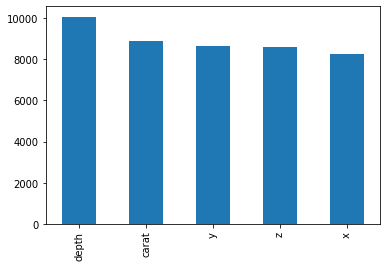

In [75]:
pd.Series(regressor.feature_importances_, index=x_train.columns).nlargest(5).plot(kind='bar')

   <b>2-sample Z test</b>, to check two means of group are equal or not?

In [76]:
z, p = stests.ztest(y_valid, x2 = predicted)

print("p-value = ", p)
print("z-value = ", z)

if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

p-value =  0.9246772514151932
z-value =  -0.09454372377941485
Accept Null Hypothesis


    Creating test between, validation dependent data with predicted data, to check the equality among them.

# Prediction Analysis

    Red is Validation data and black line is Predicted Line

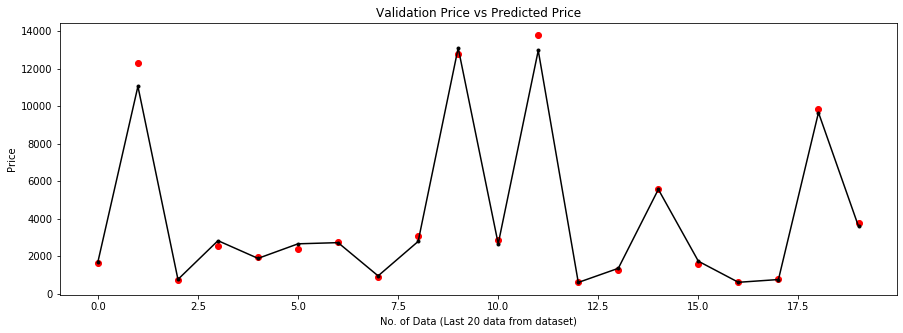

In [77]:
fig, axarr = plt.subplots(1,1, figsize=(15, 5))
plt.scatter(np.arange(20), 
            y_valid[x_valid.shape[0] - 20:x_valid.shape[0]], 
            marker='o', 
            color='red')
plt.plot(np.arange(20), 
         predicted[x_valid.shape[0] - 20:x_valid.shape[0]], 
         marker='.', 
         color='black')
plt.title('Validation Price vs Predicted Price')
plt.xlabel('No. of Data (Last 20 data from dataset)')
plt.ylabel('Price')
plt.show()

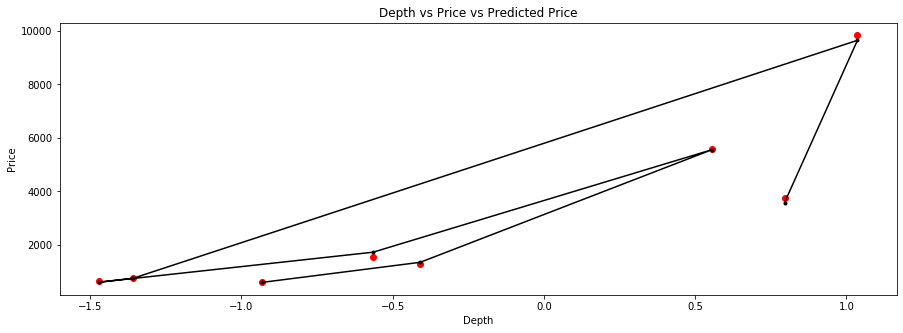

In [78]:
fig, axarr = plt.subplots(1,1, figsize=(15, 5))
plt.scatter(x_valid['z'][x_valid.shape[0]-8:x_valid.shape[0]], 
            y_valid[x_valid.shape[0]-8:x_valid.shape[0]], 
            marker='o', 
            color='red')
plt.plot(x_valid['z'][x_valid.shape[0]-8:x_valid.shape[0]], 
         predicted[x_valid.shape[0]-8:x_valid.shape[0]], 
         marker='.',
         color='black')
plt.title('Depth vs Price vs Predicted Price')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()

# Analysis on Various Models and observing predicted line with validation data line with different models

In [79]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          XGBRegressor(),
          LGBMRegressor(),
          KNeighborsRegressor(),
          Lasso(),
          ElasticNet()
         ]

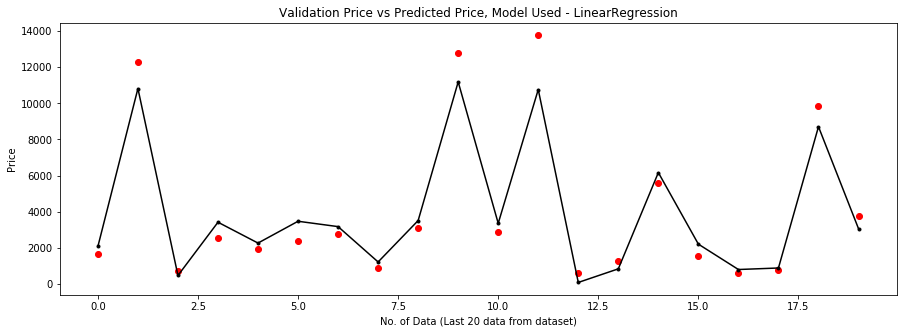

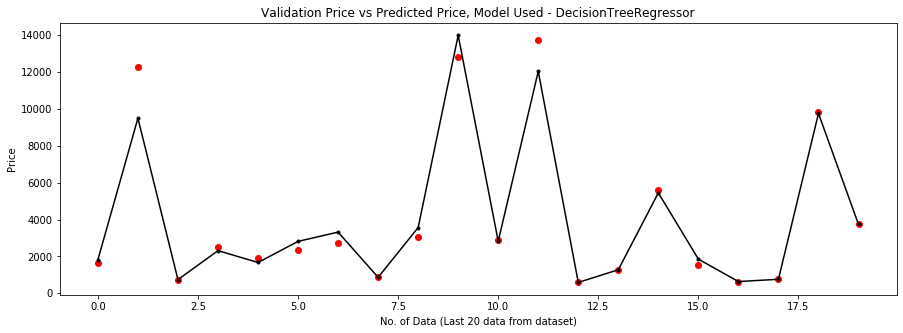

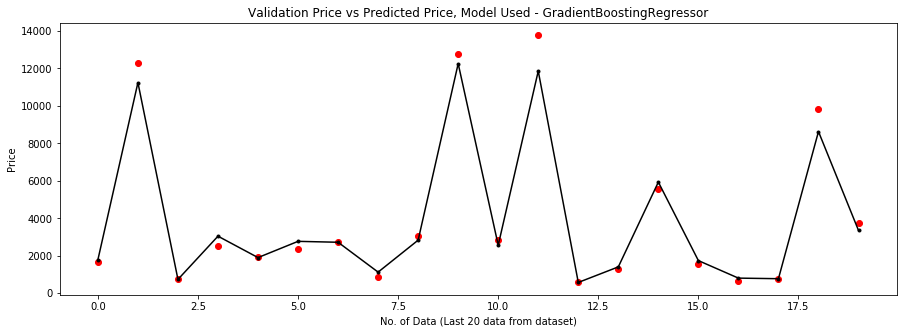

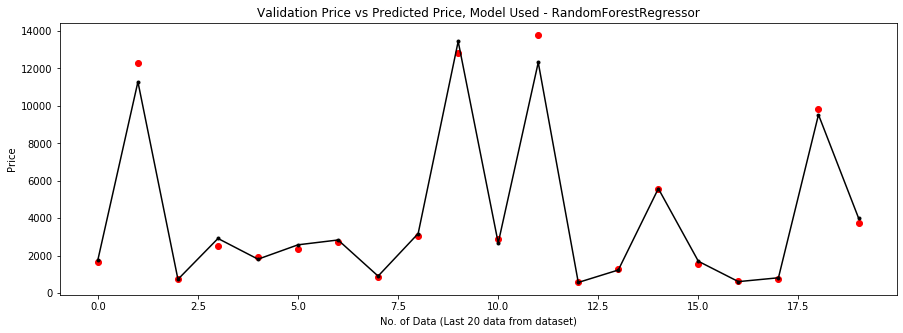

[18:53:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


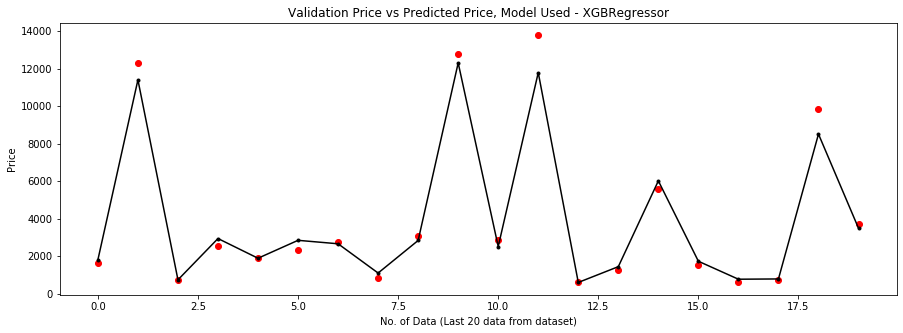

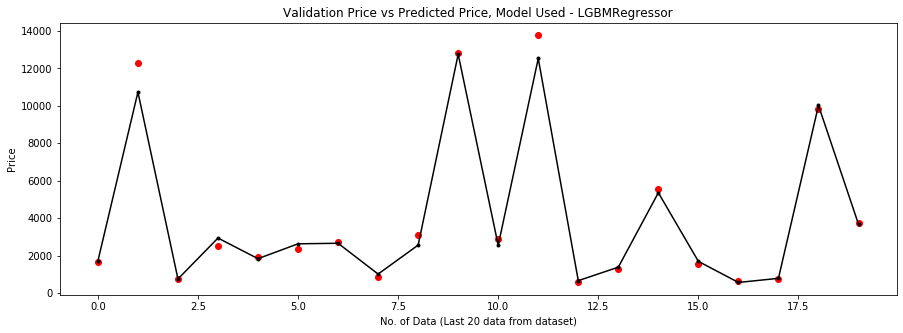

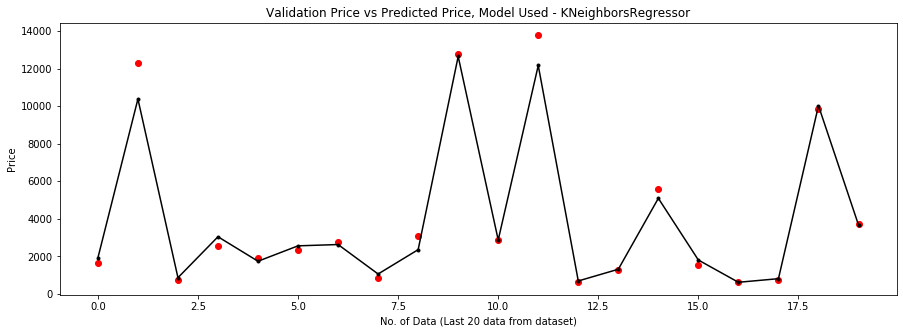

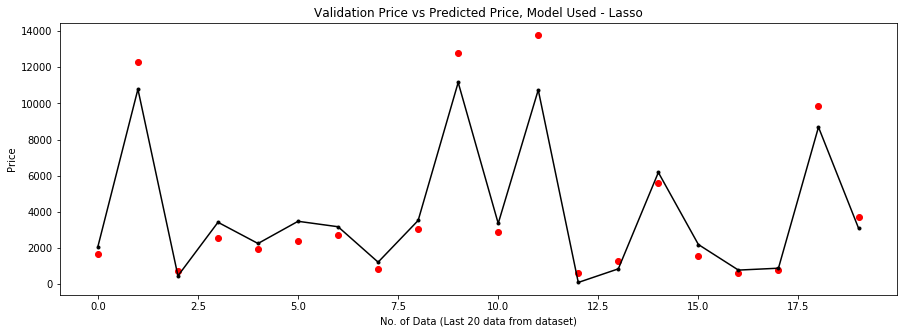

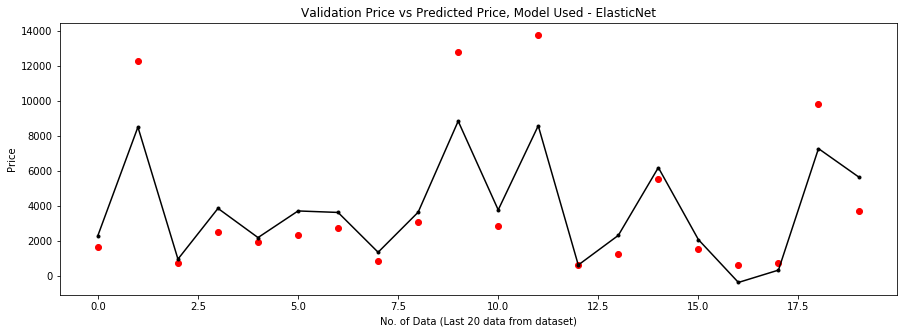

In [80]:
for model in models:
    model.fit(x_train, y_train)
    pred_cv = model.predict(x_valid)
    fig, axarr = plt.subplots(1,1, figsize=(15, 5))
    plt.scatter(np.arange(20), 
            y_valid[x_valid.shape[0] - 20:x_valid.shape[0]], 
            marker='o', 
            color='red')
    plt.plot(np.arange(20), 
         pred_cv[x_valid.shape[0] - 20:x_valid.shape[0]], 
         marker='.', 
         color='black')
    plt.title('Validation Price vs Predicted Price, Model Used - '+ type(model).__name__)
    plt.xlabel('No. of Data (Last 20 data from dataset)')
    plt.ylabel('Price')
    plt.show()

In [81]:
!pip install jupyter-cjk-xelatex

  Stored in directory: C:\Users\hungu\AppData\Local\pip\Cache\wheels\58\e4\b5\00fb54a4477562e599a067599b4c86045f27e96a5086ab7d5f
Successfully built jupyter-cjk-xelatex
